<a href="https://www.kaggle.com/code/emrhnaxu/student-performance-factors?scriptVersionId=197254590" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [2]:
train = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")

In [3]:
train_df = pd.DataFrame(train)

In [4]:
train_df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

# Drop NaN values

In [5]:
train_df = train_df.dropna(subset="Teacher_Quality")

In [6]:
train_df = train_df.dropna(subset="Parental_Education_Level")

In [7]:
train_df = train_df.dropna(subset="Distance_from_Home")

In [8]:
train_df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [9]:
train_df.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


In [10]:
level_map = {"Low":0,"Medium":1,"High":2}

In [11]:
yes_no_map = {"No":0,"Yes":1}

In [12]:
positive_negative_neutral_map = {"Negative":0,"Neutral":1,"Positive":2}

In [13]:
sexual_map = {"Female":0,"Male":1}

In [14]:
distance_map = {"Near":0,"Moderate":1,"Far":2}

In [15]:
school_map={"High School":0,"College":1,"Postgraduate":2}

In [16]:
type_map = {"Public":0,"Private":1}

In [17]:
train_df["School_Type"].unique()

array(['Public', 'Private'], dtype=object)

In [18]:
train_df["Peer_Influence"].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [19]:
train_df["Parental_Education_Level"].unique()

array(['High School', 'College', 'Postgraduate'], dtype=object)

In [20]:
train_df["Distance_from_Home"].unique()

array(['Near', 'Moderate', 'Far'], dtype=object)

In [21]:
train_df["Parental_Involvement"]= train_df["Parental_Involvement"].map(level_map)
train_df["Access_to_Resources"] = train_df["Access_to_Resources"].map(level_map)
train_df["Motivation_Level"]= train_df["Motivation_Level"].map(level_map)
train_df["Family_Income"]= train_df["Family_Income"].map(level_map)
train_df["Teacher_Quality"]= train_df["Teacher_Quality"].map(level_map)

In [22]:
train_df["Distance_from_Home"] = train_df["Distance_from_Home"].map(distance_map)

In [23]:
train_df["Gender"] = train_df["Gender"].map(sexual_map)

In [24]:
train_df["School_Type"] = train_df["School_Type"].map(type_map) 

In [25]:
train_df["Peer_Influence"] = train_df["Peer_Influence"].map(positive_negative_neutral_map)

In [26]:
train_df["Parental_Education_Level"] = train_df["Parental_Education_Level"].map(school_map)  

In [27]:
train_df["Extracurricular_Activities"]= train_df["Extracurricular_Activities"].map(yes_no_map)
train_df["Internet_Access"] = train_df["Internet_Access"].map(yes_no_map)
train_df["Learning_Disabilities"]= train_df["Learning_Disabilities"].map(yes_no_map)

In [28]:
train_df.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,2,3,0,0,0,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,0,4,0,1,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,1,4,0,2,0,1,74


<Axes: >

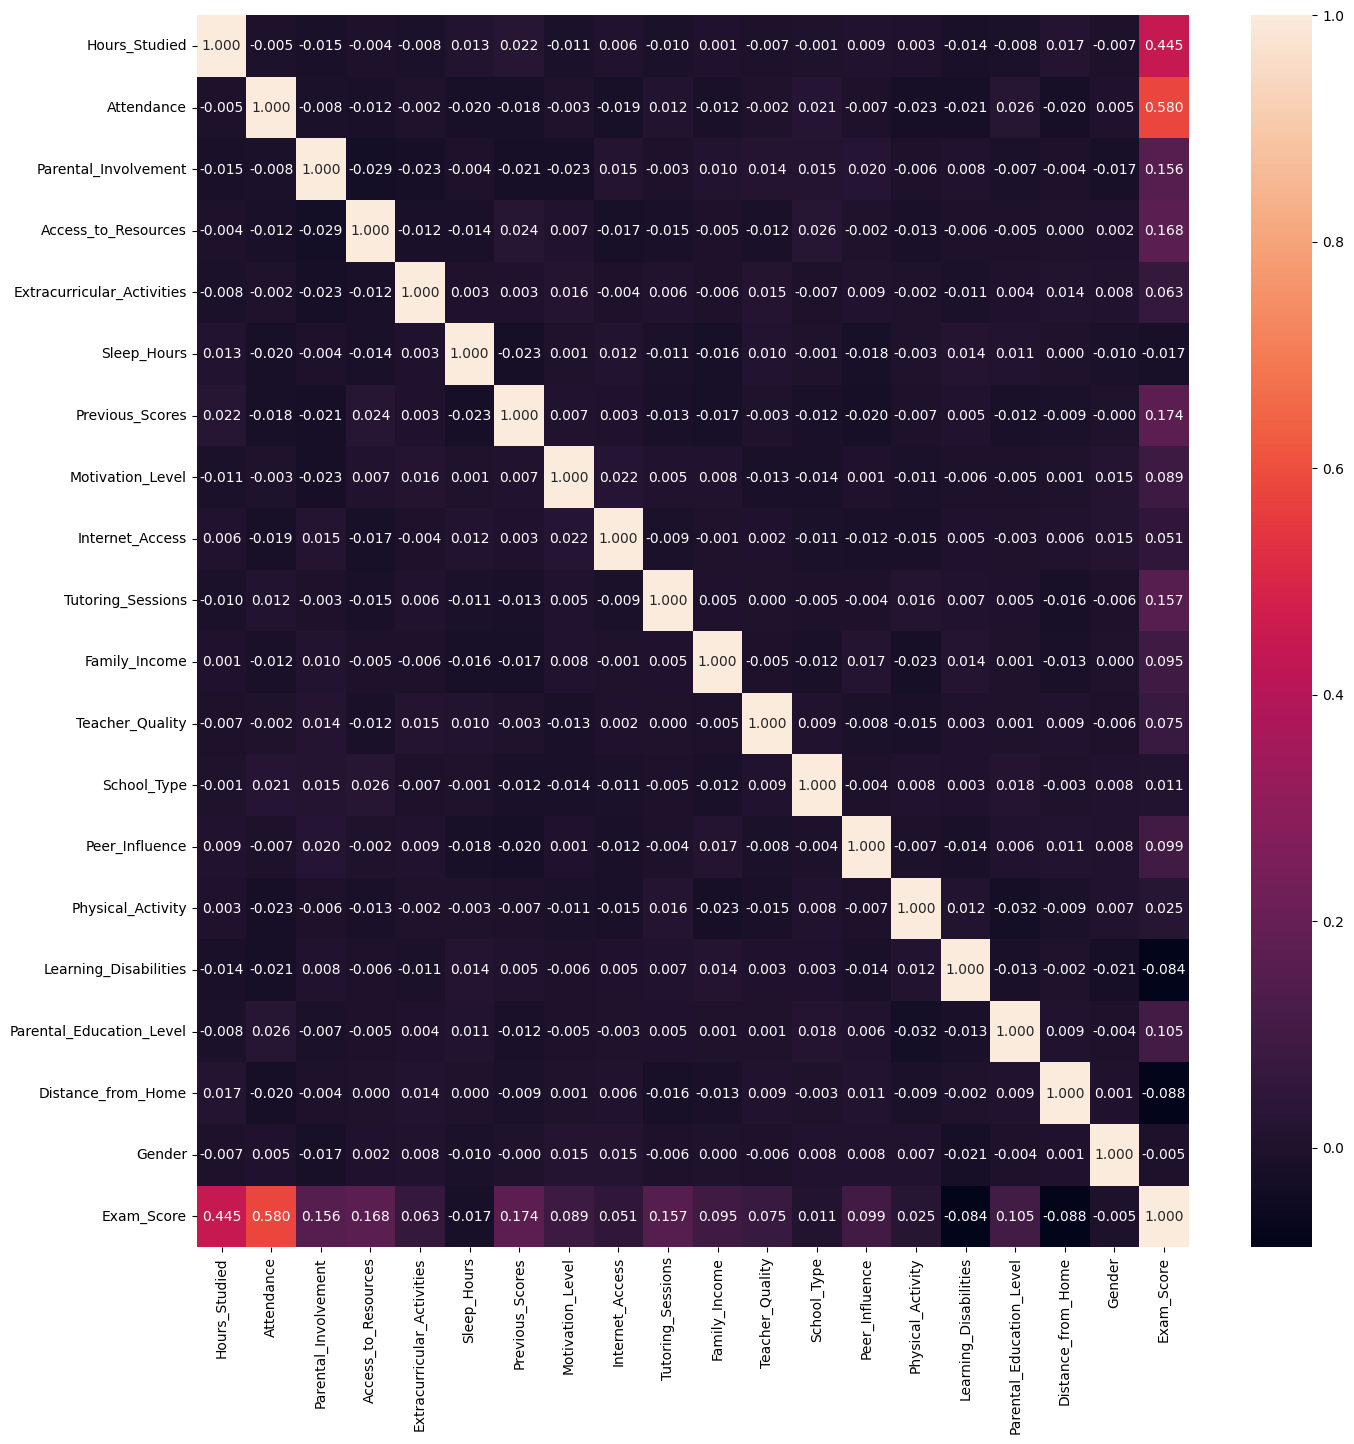

In [29]:
fig, ax = plt.subplots(figsize=(16,16))  
sns.heatmap(train_df.corr(),annot=True,fmt='.3f')

In [30]:
data= train_df
x=data.drop('Exam_Score',axis=1)
y=data['Exam_Score']
scalar=MinMaxScaler()
x=scalar.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)
print(x_train.shape)
print(x_test.shape)

(5421, 19)
(957, 19)


In [32]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the models you want to tune
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Define the hyperparameters to tune for each model
param_grid = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.1, 1, 10, 100],
        'fit_intercept': [True, False]
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1, 10],
        'fit_intercept': [True, False]
    }
}

# Initialize GridSearchCV for each model
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate the best model for each type
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    train_score = best_model.score(x_train, y_train)
    test_score = best_model.score(x_test, y_test)
    
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"Train Score: {train_score}")
    print(f"Test Score: {test_score}")

# Perform Cross-validation for the best model (e.g., Ridge with best hyperparameters)
best_ridge_model = best_models['Ridge']
cv_scores = cross_val_score(best_ridge_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and print average MSE
print(f"\nCross-validation MSE for Ridge: {np.mean(np.abs(cv_scores))}")

Best parameters for LinearRegression: {'fit_intercept': True}
Best parameters for Ridge: {'alpha': 0.1, 'fit_intercept': True}
Best parameters for Lasso: {'alpha': 0.01, 'fit_intercept': True}

LinearRegression Evaluation:
Mean Squared Error: 4.368183492140775
Train Score: 0.7186287443524664
Test Score: 0.735524786485055

Ridge Evaluation:
Mean Squared Error: 4.36828041403908
Train Score: 0.7186285167568278
Test Score: 0.7355189182700879

Lasso Evaluation:
Mean Squared Error: 4.409700597718334
Train Score: 0.7168905385432565
Test Score: 0.7330110996443115

Cross-validation MSE for Ridge: 4.288861428598144


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

# Set up the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 150],            # Fewer options for number of trees
    'max_depth': [10, 20],                # Focus on a smaller range for tree depth
    'min_samples_split': [2, 5],          # Only a couple of options for splitting
    'min_samples_leaf': [1, 2],           # Minimize leaf samples options
    'bootstrap': [True]                   # Fix this to True to reduce combinations
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)

# Evaluate using cross-validation with the best estimator
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE: ", -cv_scores.mean())

# Predict on the test set with the best model
y_pred = grid_search.best_estimator_.predict(x_test)

# Calculate MSE and R-squared
print("Test set MSE: ", mean_squared_error(y_test, y_pred))
print("Train score (R^2): ", grid_search.best_estimator_.score(x_train, y_train))
print("Test score (R^2): ", grid_search.best_estimator_.score(x_test, y_test))

Best parameters:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Cross-validation MSE:  5.448280843818747
Test set MSE:  5.867548303479897
Train score (R^2):  0.8676998232750743
Test score (R^2):  0.6447445275217647
